In [1]:
#####################################################
#
# Problema para el calculo de las curvas RTD basado en una funcion de step
# Tomado del Missen Example 19-2
#
# Realizado por
# Ali Gabriel Lara
#
# Fecha: Mayo 2014
# Revision: Ninguna
#

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
plt.style.use('fivethirtyeight')

In [4]:
# Parametros fijos del problema
#
# Datos de Concentracion del trazador en mmol/L vs tiempo en min 
c = np.array([1.00, 1.005, 1.02, 1.06, 1.20, 1.41, 1.61, 1.77, 1.92, 1.96, 2.00])
t = np.array([0, 5, 10, 15, 20, 30, 45, 60, 90, 120, 150])

# Calculo de la curva de distribucion acumulativa
## La funcion distribucion acumulativa F(t)

In [5]:
F = (c - c[0])/(c[-1] - c[0]) 

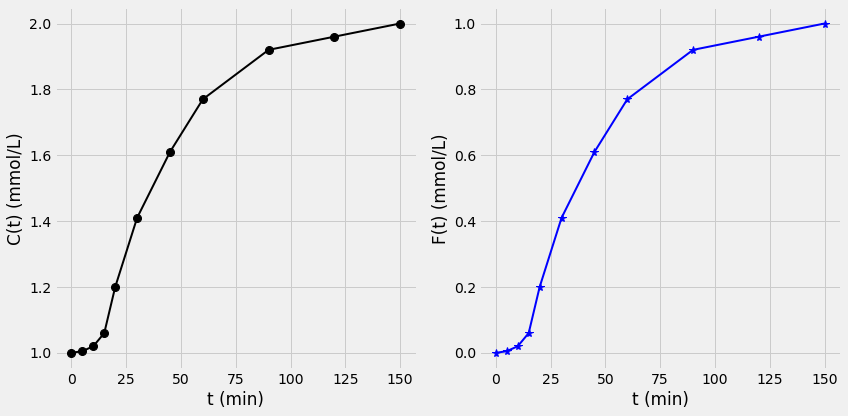

In [6]:
# Se dibuja la curva de concentracion del tracer en funcion del tiempo
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.plot(t, c, markeredgecolor = [0, 0, 0], markersize=8, marker='o', lw=2,
        color=[0, 0, 0]) 
ax2.plot(t, F, markeredgecolor = [0, 0, 1], markersize=8, marker='*', lw=2,
        color=[0, 0, 1]) 

ax1.set_xlabel('t (min)') 
ax1.set_ylabel('C(t) (mmol/L)') 

ax2.set_xlabel('t (min)') 
ax2.set_ylabel('F(t) (mmol/L)') 

plt.tight_layout()
plt.show()

## Calculo de la curva E(t)

### Using backward differencing tecnique

\begin{equation*}
E(t) = \frac{F(t)}{dt} = \frac{F_i - F_{i-1}}{t_i - t_{i-1}}
\end{equation*}

In [7]:
E_backward = [(F[i] - F[i-1])/(t[i] - t[i-1]) for i in range(1, len(F))]

### Using forward differencing tecnique

\begin{equation*}
E(t) = \frac{F(t)}{dt} = \frac{F_{i+1} - F_{i}}{t_{i+1} - t_{i}}
\end{equation*}

In [8]:
E_forward = [(F[i+1] - F[i]) / (t[i+1] - t[i]) for i in range(0, len(F)-1)]

### Using central differencing tecnique

\begin{equation*}
E(t) = \frac{F(t)}{dt} = \frac{F_{i+1} - F_{i-1}}{t_{i+1} - t_{i-1}}
\end{equation*}

In [9]:
E_central = [(F[i+1] - F[i-1])/(t[i+1] - t[i-1]) for i in range(1, len(F)-1)]

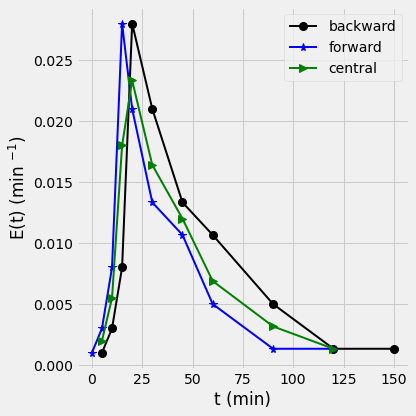

In [10]:
fig, ax = plt.subplots(figsize=(6, 6))

ax.plot(t[1:], E_backward, markeredgecolor = [0, 0, 0], markersize=8, marker='o', lw=2,
        color=[0, 0, 0], label='backward') 
ax.plot(t[0:-1], E_forward, markeredgecolor = [0, 0, 1], markersize=8, marker='*', lw=2,
        color=[0, 0, 1], label='forward') 
ax.plot(t[1:-1], E_central, markeredgecolor = [0, 0.5, 0], markersize=8, marker='>', lw=2,
        color=[0, 0.5, 0], label='central') 

ax.set_xlabel('t (min)') 
ax.set_ylabel('E(t) (min $^{-1}$)') 

ax.legend(loc='best')
plt.tight_layout()
plt.show()